![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

**Ideia original**: Luan Lima

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Teste 2: Erros no algoritmo da bisseção

## Questão 1: Todos os pontos da bisseção

Neste teste vamos estudar a evolução do erro no eixo $y$ no decorrer do algoritmo da bisseção.
Para isso, vamos usar uma variação do método da bisseção que retorne
uma lista com todos os pontos percorridos pelo algoritmo até atingir o critério de parada.

Implemente a função `bissecao_pts`, utilizando como critérios de parada `xtol`, `ytol` e `maxiter`.

In [8]:
def bissecao_pts(f, a, b, xtol=1e-8, ytol=1e-8, maxiter=100):
    pts=[]
    m = (a+b)/2
    fm = f(m)
    iters=1
    pts.append(m)
    while (abs(b-a) >= xtol) and (iters < maxiter) and (abs(fm) > ytol):
        if fm*f(a) < 0:
            b = m
            m = (a+b)/2
            fm = f(m)
            if a not in pts:
                pts.append(a)
            if m not in pts:
                pts.append(m)
        else:
            a = m
            m = (a+b)/2
            fm = f(m)
            if m not in pts:
                pts.append(m)
        iters+=1
    return pts

Alguns testes básicos para esta nova bisseção.

In [9]:
def p(a): 
    def f(x): return np.tan(x)-a
    return f

In [10]:
pts = bissecao_pts(p(1),0,np.pi/2, ytol=0)
assert abs(pts[-1]-np.pi/4) < 1e-8

In [11]:
for a in np.logspace(1,4):
    pts = bissecao_pts(p(a),0,np.pi/2, xtol=0)
    assert 1e-10 < abs(np.tan(pts[-1])-a) < 1e-8, (a, abs(np.tan(pts[-1])-a), len(pts))
    assert 1e-8 < abs(np.tan(pts[-2])-a)

In [12]:
for n in range(2,10):
    pts = bissecao_pts(p(n),0,np.pi/2, xtol=0)
    assert 25 < len(pts) < 35

## Questão 2: Aquecimento

Vamos começar estudando como se comporta o erro em $y$ para a função $f(x) = \sin(x)$. Faça um gráfico que contenha:
- no eixo horizontal, o número $n$ de iterações realizadas
- no eixo vertical, o erro em $y$ após a $n$-ésima iteração.

Utilize o intervalo padrão abaixo para todas as questões do teste.

In [13]:
a = -1+1e-12
b = 1/2

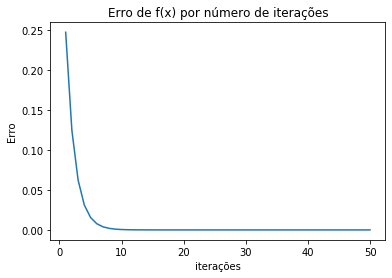

In [34]:
f = lambda x: np.sin(x)
niters = []
y = []
for i in np.linspace(1,50, 50):
    niters.append(i)
    y.append(f(bissecao_pts(f, a, b, ytol=0, xtol=0,maxiter=i)[-1]))

plt.plot(niters, np.abs(y))
plt.title("Erro de f(x) por número de iterações")
plt.xlabel("iterações")
plt.ylabel("Erro");


Comente o gráfico. O que você observa sobre a velocidade de convergência do método?

O gráfico apresenta o módulo do valor da função f(X) para o ponto retornado pela bisseção de acordo com o número máximo de iterações, indo de 1 a 100. Nota-se uma queda exponencial, o que significa que um incremento na precisão tem pouco incremento no número de iterações, ou um incremento no número de iteração tem grande incremento na precisão. Em determinado momento, um incremento no número máximo de iterações não produz nenhum aumento na precisão, porque a bisseção passa a atingir o mínimo de precisão padrão dela antes de atingir o máximo de iterações repassado a ela.

Agora represente, em um mesmo gráfico, a evolução do erro em $y$ para as funções $f(x) = \sin(x)$ e $g(x) = \sqrt[3]{x}$ (use `np.cbrt`).

Não se esqueça de botar título, legendas e labels nos eixos.

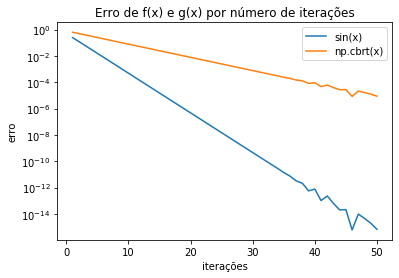

In [33]:
g = lambda x: np.cbrt(x)
niters = []
fys = []
gys = []
for i in np.linspace(1,50, 50):
    niters.append(i)
    fys.append(f(bissecao_pts(f, a, b, ytol=0, xtol=0,maxiter=i)[-1]))
    gys.append(g(bissecao_pts(g, a, b, ytol=0, xtol=0,maxiter=i)[-1]))

plt.semilogy(niters, np.abs(fys), label="sin(x)")
plt.semilogy(niters, np.abs(gys), label="np.cbrt(x)")
plt.xlabel("iterações")
plt.ylabel("erro")
plt.title("Erro de f(x) e g(x) por número de iterações")
plt.legend()
ax = plt.gca()

In [16]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

In [17]:
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""
assert ax.get_ylabel() != ""

Compare a velocidade de convergência do método relativamente às duas funções. Como você explica essa diferença? Sinta-se à vontade para utilizar mais gráficos ou caixas de código para ajudar na sua explicação.

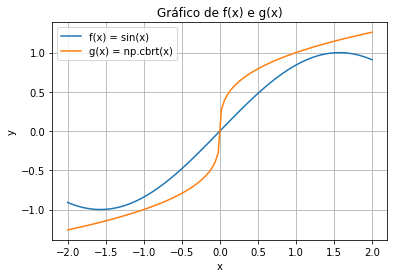

In [18]:
xs = np.linspace(-2,2,num=100)
fs = f(xs)
gs = g(xs)
plt.plot(xs, fs, label="f(x) = sin(x)")
plt.plot(xs, gs, label="g(x) = np.cbrt(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gráfico de f(x) e g(x)")
plt.legend()
plt.grid()
plt.show()

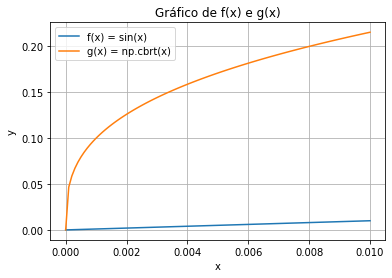

In [19]:
xs = np.linspace(0,0.01,num=100)
fs = f(xs)
gs = g(xs)
plt.plot(xs, fs, label="f(x) = sin(x)")
plt.plot(xs, gs, label="g(x) = np.cbrt(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gráfico de f(x) e g(x)")
plt.legend()
plt.grid()
plt.show()

De acordo com os novos gráficos mostrados, a função $sin(x)$ está mais próxima de y=0 que a $\sqrt[3]{x}$ e a cada iteração se aproxima mais rápido de y=0. O segundo gráfico faz uma aproximação em x=0 e evidencia que, mesmo em pontos na ordem de $10^{-3}$, f(x) está mais próxima de y=0 que g(x). Poderíamos reduzir ainda mais a ordem e ver o mesmo comportamento. Isto faz com que a cada nova iteração, a função f(x) esteja mais próxima da raiz do que a g(x), então o erro diminui mais. No final das contas, a g(x) atinge o mínimo padrão de erro no eixo x primeiro, algumas iterações depois que f(x) atinge o mínimo padrão do erro para o eixo y. 

## Questão 3: Uma função diferentona

Agora vamos bolar uma função um pouco diferente para explorar os limites do método de bisseção. A função vai ser:

In [20]:
def h(x):
    return np.sign(x) / np.log(np.abs(x))

Faça um gráfico dessa função em uma vizinhança de 0.

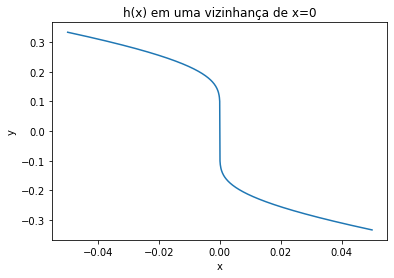

In [21]:
x = np.linspace(-0.05,0.05, num=1000)
y = h(x)
plt.plot(x,y)
plt.title("h(x) em uma vizinhança de x=0")
plt.xlabel("x")
plt.ylabel("y")
ax = plt.gca()

In [22]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 1

Faça mais um gráfico, dessa vez comparando a evolução dos erros para as funções $f$, $g$ e $h$.

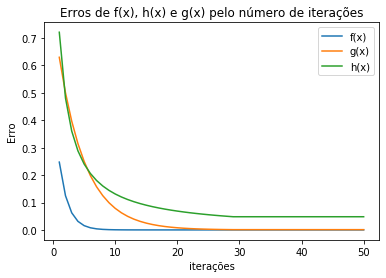

In [32]:
x2 = np.linspace(1,50, num=50)
fy = []
gy = []
hy = []
for i in x2:
    fy.append(abs(f(bissecao_pts(f, a, b, maxiter=i)[-1])))
    gy.append(abs(g(bissecao_pts(g, a, b, maxiter=i)[-1])))
    hy.append(abs(h(bissecao_pts(h, a, b, maxiter=i)[-1])))
plt.plot(x2,fy, label="f(x)")
plt.plot(x2,gy, label="g(x)")
plt.plot(x2,hy, label="h(x)")
plt.legend()
plt.title("Erros de f(x), h(x) e g(x) pelo número de iterações")
plt.xlabel("iterações")
plt.ylabel("Erro")
ax = plt.gca()

In [24]:
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""
assert ax.get_ylabel() != ""

O que aconteceu desta vez? Explique o porquê.

A nova função tem comportamento parecido com a g(x), está muito mais acima no eixo y do que a f(x), e em alguns momentos acima também da g(x), além de se aproximar mais devagar ainda de y=0. h(x) e g(x) terminam a bisseção pelo mesmo motivo, o mínimo padrão do erro no x é atingido. Além disso, g(x) não está definida em x=0.

## Questão 4: O outro lado da moeda

Para fechar com chave de ouro, vamos estudar a evolução do erro da função $h_2(x) = h^{-1}(x)$, isto é, a função $h_2$ tal que $h_2(h(x)) = x$ (digamos, em uma vizinhança de $x=0$). Implemente a função $h_2$ abaixo:

In [25]:
def h2(y): # y = h(x)
    # Achar um x, h(x) - y = 0
    def inv(x):
        return h(x) - y
    x2 = bissecao_pts(inv, a, -a, maxiter=350, ytol=0, xtol=0)[-1]
    return x2 # x2 é o x em h(x) = y

In [26]:
for x in np.linspace(-1+1e-8,1-1e-8,200):
    assert abs(h2(h(x))-x) < 1e-15, (x, x - h2(h(x)))
    assert abs(h(h2(x))-x) < 1e-15, (x, x - h(h2(x)))

C:\Users\gusta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


Repita os estudos realizados anteriormente, com a inclusão de $h_2$.

C:\Users\gusta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


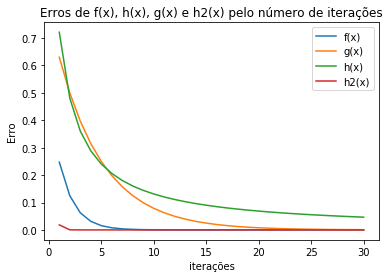

In [29]:
x2 = np.linspace(1,30, num=30)
fy = []
gy = []
hy = []
h2y =[]
for i in x2:
    fy.append(abs(f(bissecao_pts(f, a, b, ytol=0, xtol=0,  maxiter=i)[-1])))
    gy.append(abs(g(bissecao_pts(g, a, b, ytol=0, xtol=0, maxiter=i)[-1])))
    hy.append(abs(h(bissecao_pts(h, a, b, ytol=0, xtol=0, maxiter=i)[-1])))
    h2y.append(abs(h2(bissecao_pts(h2, a, b, maxiter=i)[-1])))
plt.plot(x2,fy, label="f(x)")
plt.plot(x2,gy, label="g(x)")
plt.plot(x2,hy, label="h(x)")
plt.plot(x2,h2y, label="h2(x)")
plt.legend()
plt.title("Erros de f(x), h(x), g(x) e h2(x) pelo número de iterações")
plt.xlabel("iterações")
plt.ylabel("Erro")
ax = plt.gca()

Comente os resultados abaixo.

A forma como a função h2 foi implementada usa a bisseção com valores exigentes para os critérios de parada, para que o erro dela esteja dentro do aceitável nos asserts, dessa forma o gráfico dela fica com o erro extretamente menor que as demais funções.